# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/busraaltun/Desktop/Assignment-4/newamazonsample.csv')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
#I want to check that missing values of my data set. 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
uniq_id - 0%
product_name - 0%
manufacturer - 0%
price - 0%
number_available_in_stock - 0%
number_of_reviews - 0%
number_of_answered_questions - 8%
average_review_rating - 0%
amazon_category_and_sub_category - 7%
customers_who_bought_this_item_also_bought - 11%
description - 7%
product_information - 1%
product_description - 7%
items_customers_buy_after_viewing_this_item - 31%
customer_questions_and_answers - 91%
customer_reviews - 0%
sellers - 31%


In [5]:
#customer_questions_and_answers has too high percentage of missing data, 91%. We can drop that. 
cols_to_drop = ['customer_questions_and_answers']
newdf = df.drop(cols_to_drop, axis=1)

In [6]:
print(newdf.columns)

Index(['Unnamed: 0', 'uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews',
       'sellers'],
      dtype='object')


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'number_available_in_stock'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'number_of_answered_questions'}>,
        <AxesSubplot:title={'center':'average_review_rating'}>]],
      dtype=object)

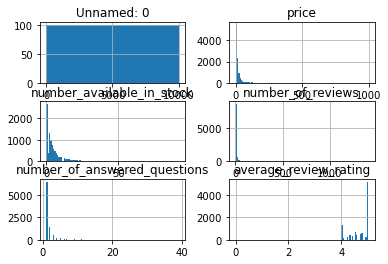

In [7]:
# cheking the outliers of float columns 

newdf.hist(bins=100)

<AxesSubplot:>

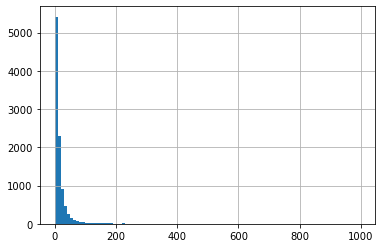

In [8]:

newdf['price'].hist(bins=100)

<AxesSubplot:>

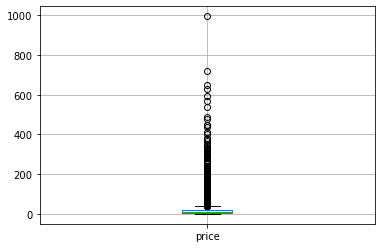

In [9]:
newdf.boxplot(column=['price'])

<AxesSubplot:>

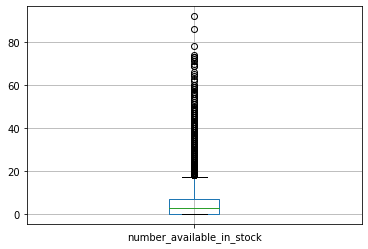

In [10]:
newdf.boxplot(column=['number_available_in_stock'])

<AxesSubplot:>

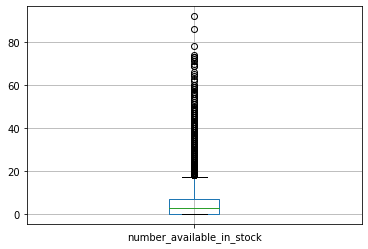

In [11]:
newdf.boxplot(column=['number_available_in_stock'])

<AxesSubplot:>

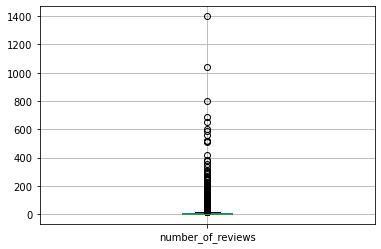

In [12]:
newdf.boxplot(column=['number_of_reviews'])

<AxesSubplot:>

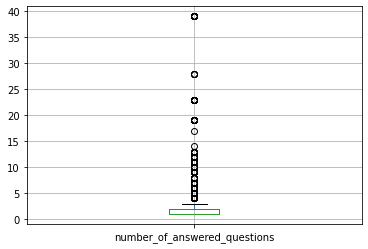

In [13]:
newdf.boxplot(column=['number_of_answered_questions'])

<AxesSubplot:>

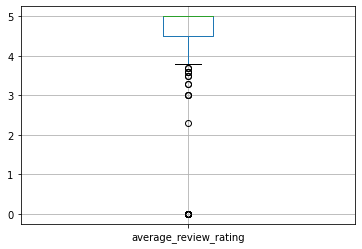

In [14]:
newdf.boxplot(column=['average_review_rating'])

In [15]:
# After the checking the outliers of dataset. I think that I don't need to change anything for now. Outliers are 
#exceptable and I think they are going to be meaningfull with dataset. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [16]:
# checking the duplicates depends on the uniq_id column. 


key = ['price', 'number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'average_review_rating']

newdf.fillna(-999).groupby(key)['uniq_id'].count().sort_values(ascending=False).head(20)

price  number_available_in_stock  number_of_reviews  number_of_answered_questions  average_review_rating
0.00   0.0                        1.0                1.0                           5.0                      104
       1.0                        1.0                1.0                           5.0                       86
       2.0                        1.0                1.0                           5.0                       47
       1.0                        2.0                1.0                           5.0                       32
       3.0                        1.0                1.0                           5.0                       31
       1.0                        1.0                1.0                           4.0                       29
       0.0                        1.0                1.0                           4.0                       24
                                                     2.0                           5.0                       23

In [20]:
newdf['uniq_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: uniq_id, Length: 10000, dtype: bool

In [21]:
newdf['uniq_id'].duplicated().sum()

0

In [22]:
# All products on the dataset have their own uniq_id. Depends on the uniq_id column, data set doesn't have any 
#duplicates. 

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [23]:
# Inconsistent data checking part is a little bit problematic for this data set. Object data columns are taken from
# amazon website like copy-paste method because of that I am not able clean them perfectly. Consequently, I think 
# passing this part is better for dataset. 

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
Actually, no. I found one column has to much missing data and I dropped that. I found couple of outliers but I want to keep that and dataset doesnt have any duplicates. 
2. Did the process of cleaning your data give you new insights into your dataset?
Yes, I found to chance to look at my dataset deeply in this cleaning process and understand that which part of dataset is workable.
and also Especially, I didn't have any chance to do anything in inconsistent data part but thanks for that part I understand my dataset more.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualization?

I want to check and show relationship between couple of columns. And also depends on my main questions of this project, I am planning to do visualizations. 